In [1]:
import lightgbm
from testbed.models.treeffuser import Treeffuser
from treeffuser import treeffuser as tf

import matplotlib.pyplot as plt
import numpy as np


from numpy.random import PCG64
from _generator import CustomRandomGenerator, CIG_conditional_density

In [2]:
rng = CustomRandomGenerator(PCG64(seed=0))


def p_atom_fn(x):
    return 0.1


shape = 2
scale = 1
n = 20 * 10**3

x, y = rng.CIG(p_atom_fn, shape=shape, scale=scale, size=n)

model = tf.LightGBMTreeffuser(
    sde_initialize_with_data=True,
    n_estimators=10000,
    num_leaves=1000,
    early_stopping_rounds=50,
    learning_rate=0.1,
    # verbose=2,
)
# model = Treeffuser()
fit = model.fit(X=x.reshape(-1, 1), y=y.reshape(-1, 1))

## Figure 1

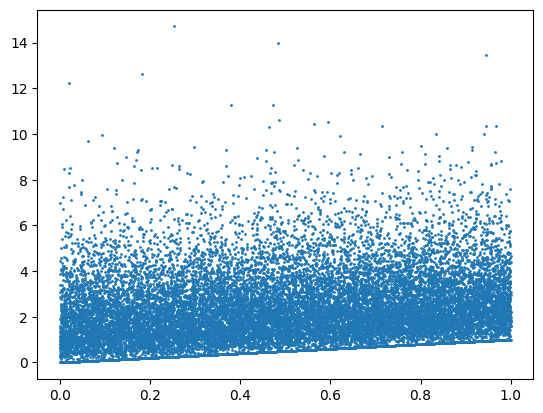

In [3]:
plt.scatter(x, y, s=1)

## Figure 2

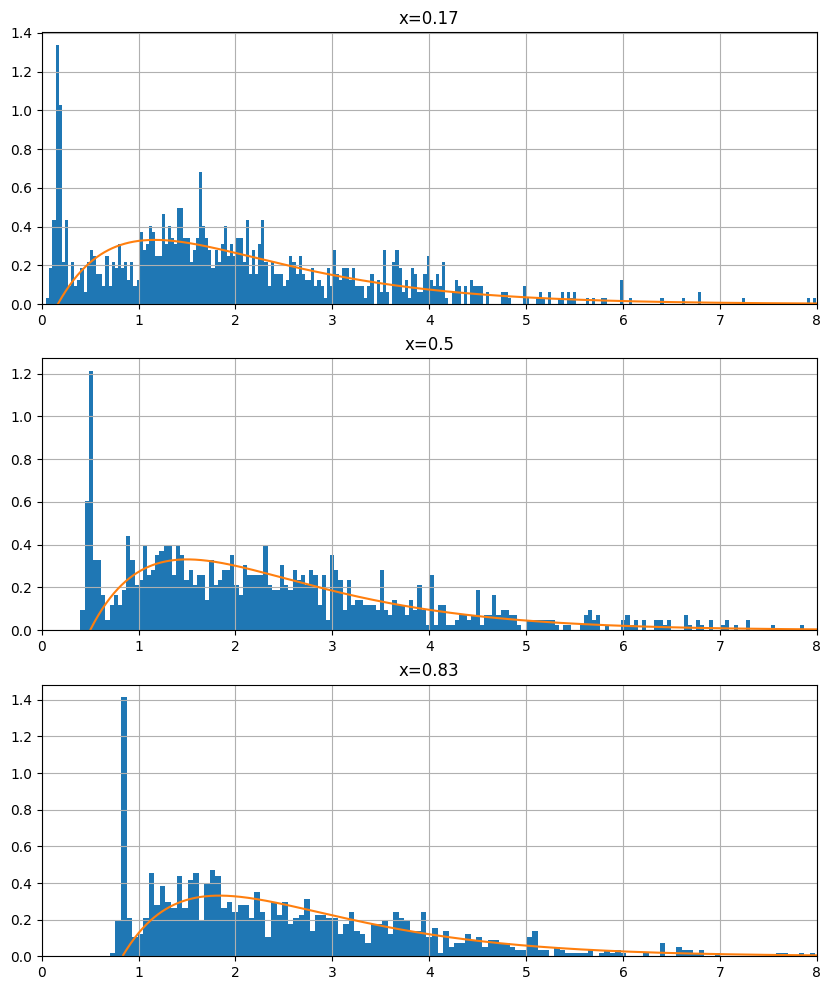

In [4]:
X = (np.array([1, 3, 5]) / 6).reshape(-1, 1)
bandwidhts = [0.1, 0.09, 0.045]
y_lims = [(0, 8), (0, 8), (0, 8)]

fig, axs = plt.subplots(3, 1, figsize=(10, 12))
for i, bw in enumerate(bandwidhts):
    y_plot = np.linspace(y_lims[i][0], y_lims[i][1], 1000).reshape(-1, 1)

    y_samples = model.sample(X[i].reshape(1, 1), n_samples=10**3)
    axs[i].hist(y_samples.reshape(-1), bins=300, density=True)

    density_true = CIG_conditional_density(
        x=X[i], p_atom=p_atom_fn(X[i]), shape=shape, scale=scale
    )
    density_true = density_true(y_plot)
    density_true = np.where(density_true == 0, None, density_true)
    axs[i].plot(y_plot, density_true, label="true")

    # plt.legend()
    axs[i].set_xlim(y_lims[i][0], y_lims[i][1])
    axs[i].set_title(f"x={np.round(X[i], 2).item()}")
    axs[i].grid()